In [4]:
import os
os.chdir('../..')
import numpy as np
import pickle
from tqdm import tqdm

In [5]:
from molexplain.utils import DATA_PATH

In [6]:
with open(os.path.join(DATA_PATH, 'ppb', 'data_ppb.pt'), 'rb') as handle:
    inchis, values = pickle.load(handle)


with open(os.path.join(DATA_PATH, 'ppb', 'sim_ppb.pt'), 'rb') as handle:
    sim = pickle.load(handle)
    
diff_true = np.load(os.path.join(DATA_PATH, 'ppb', 'diff_exp.npy'))
diff_hat = np.load(os.path.join(DATA_PATH, 'ppb', 'diff_hat.npy'))

In [7]:
sim.shape

(4634, 4634)

In [8]:
diff_true.shape

(4634, 4634)

In [9]:
diff_hat.shape

(4634, 4634)

In [10]:
ligand_i = []
ligand_j = []

long_sim = []
long_true = []
long_hat = []

for idx_i, inchi_i in enumerate(inchis):
    for idx_j, inchi_j in enumerate(inchis):
        if idx_i < idx_j:
            ligand_i.append(inchi_i)
            ligand_j.append(inchi_j)
            long_sim.append(sim[idx_i, idx_j])
            long_true.append(diff_true[idx_i, idx_j])
            long_hat.append(diff_hat[idx_i, idx_j])
    

In [11]:
import pandas as pd
pd.set_option('display.max_rows', 1000)

df_pairs = pd.DataFrame({'inchi_i': ligand_i,
                         'inchi_j': ligand_j,
                         'similarity': long_sim,
                         'diff_exp': long_true,
                         'diff_pred': long_hat})


In [12]:
def sali_index(sim, diff):
    return np.abs(diff) / (1 - sim)

In [13]:
df_pairs = df_pairs.loc[df_pairs['similarity'] < 1.0]
df_pairs['sali_exp'] = sali_index(df_pairs['similarity'], df_pairs['diff_exp'])
df_pairs['sali_pred'] = sali_index(df_pairs['similarity'], df_pairs['diff_pred'])
df_pairs.sort_values('sali_pred', ascending=False, inplace=True)
df_pairs.reset_index(inplace=True)

In [14]:
df_pairs.head(n=800)

,index,inchi_i,inchi_j,similarity,diff_exp,diff_pred,sali_exp,sali_pred
0,850807,InChI=1S/C56H78N2O16/c1-57(23-19-37-33-45(65-7...,InChI=1/C56H78N2O16.2ClH/c1-57(23-19-37-33-45(...,0.990385,4.000000e+00,4.277279,416.000942,444.838066
1,9305767,InChI=1S/C19H16ClF3N6O2/c20-15-9-27-17(28-11-1...,InChI=1S/C19H16ClF3N6O3/c20-15-9-26-17(27-11-1...,0.777778,-5.600000e+01,-86.574753,252.000015,389.586411
2,694385,InChI=1S/C43H66O15/c1-20-38(49)32(55-23(4)44)1...,InChI=1/C43H66O14/c1-21-38(48)33(54-24(4)44)19...,0.871345,-5.500000e+01,-49.702454,427.500046,386.323659
3,692981,InChI=1S/C43H66O15/c1-20-38(49)32(55-23(4)44)1...,InChI=1S/C43H66O14/c1-21-38(48)33(54-24(4)44)1...,0.871345,-5.500000e+01,-49.371170,427.500046,383.748681
4,7267000,InChI=1/C41H64O13/c1-20-36(46)29(42)16-34(49-2...,InChI=1/C41H64O14/c1-19-36(47)28(42)15-34(50-1...,0.865031,7.025000e+01,51.058800,520.488526,378.299209
5,7268421,InChI=1/C41H64O13/c1-20-36(46)29(42)16-34(49-2...,InChI=1S/C41H64O14/c1-19-36(47)28(42)15-34(50-...,0.865031,7.175000e+01,51.058784,531.602160,378.299096
6,2577287,InChI=1S/C41H64O13/c1-20-36(46)29(42)16-34(49-...,InChI=1/C41H64O14/c1-19-36(47)28(42)15-34(50-1...,0.865031,7.050000e+01,50.614326,522.340799,375.006067
7,2578708,InChI=1S/C41H64O13/c1-20-36(46)29(42)16-34(49-...,InChI=1S/C41H64O14/c1-19-36(47)28(42)15-34(50-...,0.865031,7.200000e+01,50.614311,533.454433,375.005954
8,685624,InChI=1S/C41H64O14/c1-19-36(47)28(42)15-34(50-...,InChI=1/C41H64O13/c1-20-36(46)29(42)16-34(49-2...,0.865031,-6.875000e+01,-50.261253,509.374892,372.390117
9,684218,InChI=1S/C41H64O14/c1-19-36(47)28(42)15-34(50-...,InChI=1S/C41H64O13/c1-20-36(46)29(42)16-34(49-...,0.865031,-6.900000e+01,-49.816780,511.227165,369.096974


In [15]:
inchi_i, inchi_j = df_pairs.loc[3, 'inchi_i'], df_pairs.loc[3, 'inchi_j']

In [16]:
from rdkit.Chem.inchi import MolFromInchi
mol_i, mol_j = MolFromInchi(inchi_i), MolFromInchi(inchi_j)

RDKit WARNING: [15:38:28] Enabling RDKit 2019.09.3 jupyter extensions


In [17]:
from molexplain.vis import molecule_importance
from molexplain.utils import MODELS_PATH
from molexplain.train import DEVICE

Using backend: pytorch


In [18]:
import torch
model_pt = os.path.join(MODELS_PATH, 'ppb_noHs.pt')

from molexplain.net import MPNNPredictor

model = MPNNPredictor(node_in_feats=49,
                      edge_in_feats=10,
                      global_feats=4,
                      n_tasks=1).to(DEVICE) 
model.load_state_dict(torch.load(model_pt,
                                 map_location=DEVICE))

<All keys matched successfully>

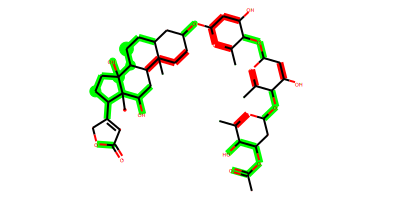

In [36]:
svg, img, _, _, global_importance = molecule_importance(mol_i,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

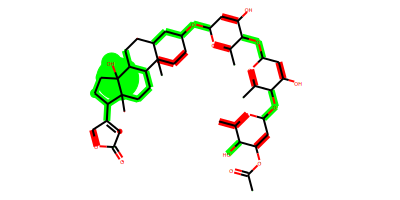

In [37]:
svg, img, _, _, global_importance = molecule_importance(mol_j,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img # OH different

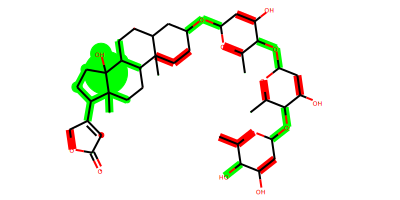

In [38]:
inchi_i, inchi_j = df_pairs.loc[4, 'inchi_i'], df_pairs.loc[4, 'inchi_j']
mol_i, mol_j = MolFromInchi(inchi_i), MolFromInchi(inchi_j)
svg, img, _, _, global_importance = molecule_importance(mol_i,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-3,
                                                      addHs=False)
img

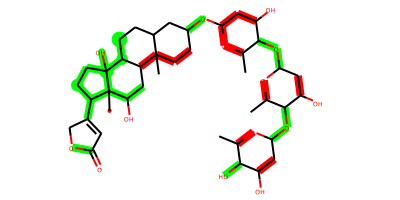

In [39]:
svg, img, _, _, global_importance = molecule_importance(mol_j,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-3,
                                                      addHs=False)
img

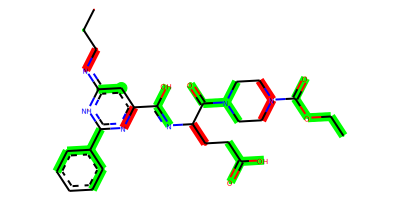

In [42]:
inchi_i, inchi_j = df_pairs.loc[10, 'inchi_i'], df_pairs.loc[10, 'inchi_j'] # could show
mol_i, mol_j = MolFromInchi(inchi_i), MolFromInchi(inchi_j)
svg, img, _, _, global_importance = molecule_importance(mol_i,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

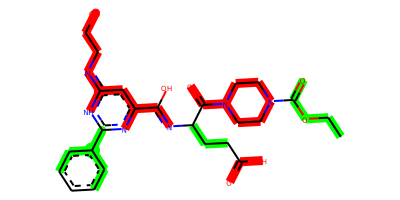

In [43]:
svg, img, _, _, global_importance = molecule_importance(mol_j,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

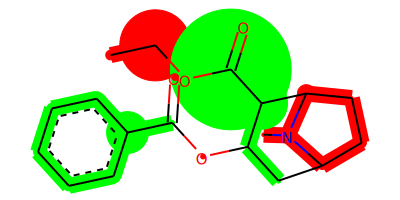

In [52]:
inchi_i, inchi_j = df_pairs.loc[15, 'inchi_i'], df_pairs.loc[15, 'inchi_j'] # could show
mol_i, mol_j = MolFromInchi(inchi_i), MolFromInchi(inchi_j)
svg, img, _, _, global_importance = molecule_importance(mol_i,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

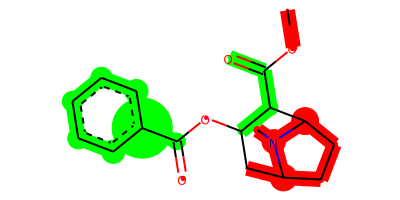

In [53]:
svg, img, _, _, global_importance = molecule_importance(mol_j,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

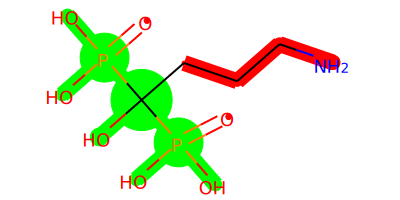

In [55]:
inchi_i, inchi_j = df_pairs.loc[18, 'inchi_i'], df_pairs.loc[18, 'inchi_j']  ## very very ugly case
mol_i, mol_j = MolFromInchi(inchi_i), MolFromInchi(inchi_j)
svg, img, _, _, global_importance = molecule_importance(mol_i,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-4,
                                                      addHs=False)
img

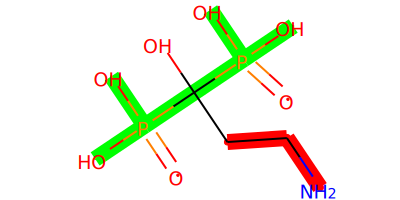

In [57]:
svg, img, _, _, global_importance = molecule_importance(mol_j,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-4,
                                                      addHs=False)
img

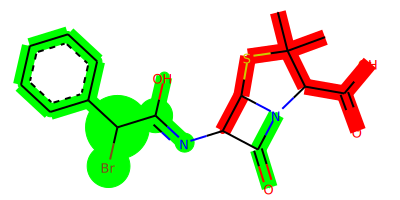

In [58]:
inchi_i, inchi_j = df_pairs.loc[24, 'inchi_i'], df_pairs.loc[24, 'inchi_j']  
mol_i, mol_j = MolFromInchi(inchi_i), MolFromInchi(inchi_j)
svg, img, _, _, global_importance = molecule_importance(mol_i,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-3,
                                                      addHs=False)
img

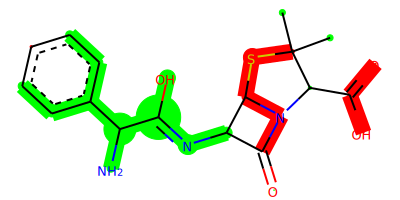

In [60]:
svg, img, _, _, global_importance = molecule_importance(mol_j,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-3,
                                                      addHs=False)
img

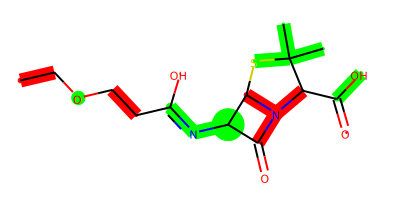

In [68]:
inchi_i, inchi_j = df_pairs.loc[37, 'inchi_i'], df_pairs.loc[37, 'inchi_j']  ## weird case? move O out of the chain and now it likes the OH?
mol_i, mol_j = MolFromInchi(inchi_i), MolFromInchi(inchi_j)
svg, img, _, _, global_importance = molecule_importance(mol_i,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

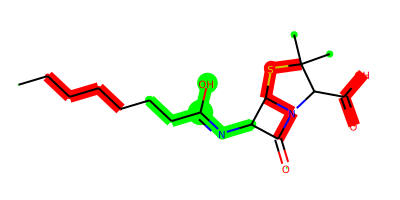

In [69]:
svg, img, _, _, global_importance = molecule_importance(mol_j,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

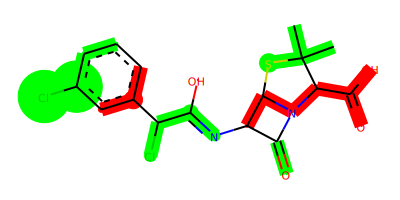

In [72]:
inchi_i, inchi_j = df_pairs.loc[40, 'inchi_i'], df_pairs.loc[40, 'inchi_j'] # can show
mol_i, mol_j = MolFromInchi(inchi_i), MolFromInchi(inchi_j)
svg, img, _, _, global_importance = molecule_importance(mol_i,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

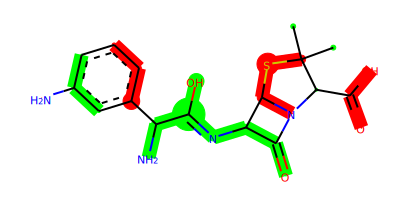

In [73]:
svg, img, _, _, global_importance = molecule_importance(mol_j,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

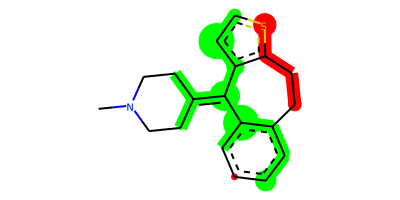

In [74]:
inchi_i, inchi_j = df_pairs.loc[42, 'inchi_i'], df_pairs.loc[42, 'inchi_j']  # weird case 2
mol_i, mol_j = MolFromInchi(inchi_i), MolFromInchi(inchi_j)
svg, img, _, _, global_importance = molecule_importance(mol_i,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

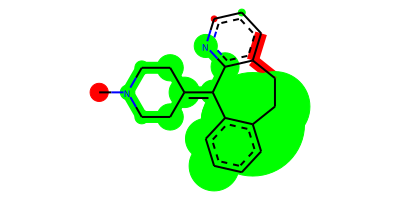

In [76]:
svg, img, _, _, global_importance = molecule_importance(mol_j,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

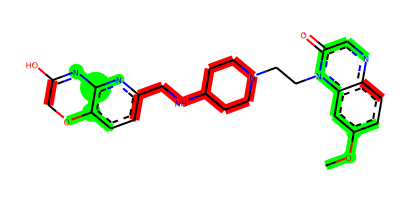

In [79]:
inchi_i, inchi_j = df_pairs.loc[49, 'inchi_i'], df_pairs.loc[49, 'inchi_j']
mol_i, mol_j = MolFromInchi(inchi_i), MolFromInchi(inchi_j)
svg, img, _, _, global_importance = molecule_importance(mol_i,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

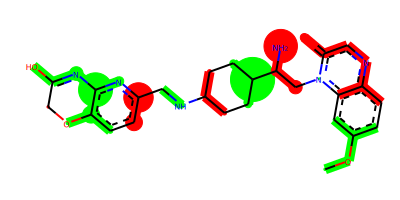

In [80]:
svg, img, _, _, global_importance = molecule_importance(mol_j,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

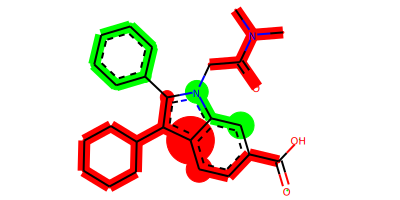

In [82]:
inchi_i, inchi_j = df_pairs.loc[64, 'inchi_i'], df_pairs.loc[64, 'inchi_j']   # bad case
mol_i, mol_j = MolFromInchi(inchi_i), MolFromInchi(inchi_j)
svg, img, _, _, global_importance = molecule_importance(mol_i,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

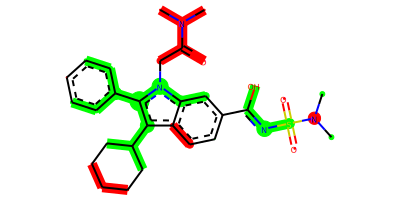

In [83]:
svg, img, _, _, global_importance = molecule_importance(mol_j,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

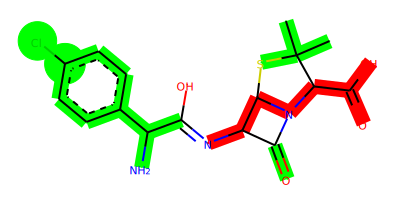

In [22]:
inchi_i, val_i, inchi_j, val_j = df_pairs.loc[77, 'inchi_i'], df_pairs.loc[77, "diff_exp"] df_pairs.loc[77, 'inchi_j']   # can show
mol_i, mol_j = MolFromInchi(inchi_i), MolFromInchi(inchi_j)
svg, img, _, _, global_importance = molecule_importance(mol_i,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-4,
                                                      addHs=False)
img

In [23]:
from molexplain.utils import EXAMPLE_PATH

with open(os.path.join(EXAMPLE_PATH, "ppb_scaffold_pos.svg"), "w+") as handle:
    handle.write(svg)

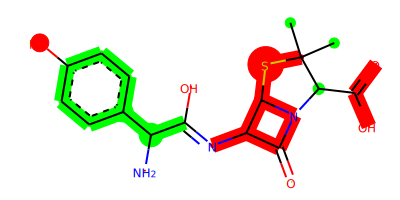

In [24]:
svg, img, _, _, global_importance = molecule_importance(mol_j,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

In [25]:
with open(os.path.join(EXAMPLE_PATH, "ppb_scaffold_neg.svg"), "w+") as handle:
    handle.write(svg)

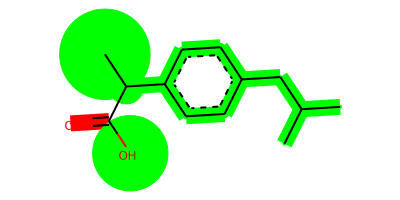

In [98]:
inchi_i, inchi_j = df_pairs.loc[90, 'inchi_i'], df_pairs.loc[90, 'inchi_j']   # can show
mol_i, mol_j = MolFromInchi(inchi_i), MolFromInchi(inchi_j)
svg, img, _, _, global_importance = molecule_importance(mol_i,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

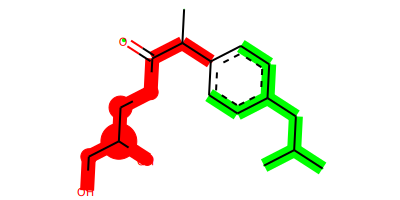

In [99]:
svg, img, _, _, global_importance = molecule_importance(mol_j,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img